# 0 Mise en place des fonctions de travail 

In [11]:
#from sorting import *
import random

def generate_random_array(debug=False, N=21):
    
    """Renvoie un tableau contenant toutes les valeurs entières de 0 (inclus)
    à N (exclus) rangées dans un ordre aléatoire

    Args:
        debug (boolean): quand debug est vrai, la fonction renvoie toujours le
                         même tableau afin de simplifier le débogage de vos
                         algorithmes de tri
        N (int): la taille du tableau à renvoyer

    Returns:
        list[int]: un tableau d'entiers, de taille N, non ordonné
    """

    if debug:
        return [3, 9, 7, 1, 6, 2, 8, 4, 5, 0]

    array = list(range(0, N))
    random.shuffle(array)

    return array

In [12]:
print (generate_random_array())
print(generate_random_array(True))
print(generate_random_array(N=31))


[12, 8, 7, 9, 1, 18, 11, 3, 2, 20, 5, 19, 4, 16, 10, 14, 17, 0, 6, 13, 15]
[3, 9, 7, 1, 6, 2, 8, 4, 5, 0]
[25, 29, 27, 12, 5, 19, 16, 11, 24, 10, 1, 30, 4, 6, 22, 13, 14, 0, 9, 26, 20, 23, 2, 8, 15, 7, 21, 18, 17, 28, 3]


In [17]:
def swap(tab, i, j):
    """Échange la place des éléments aux indices i et j du tableau"""
    assert i < len(tab) and j < len(tab) #warning; i or j is out of index
    assert i >= 0 and j >= 0 #warning; i or j is under 0 
    tab[i], tab[j]=tab[j],tab[i]

    



In [18]:
random_array = generate_random_array()
print(random_array)

swap(random_array, 0, 2)
print(random_array)

[20, 19, 5, 11, 4, 0, 6, 18, 7, 15, 8, 9, 13, 17, 3, 14, 2, 1, 16, 12, 10]
[5, 19, 20, 11, 4, 0, 6, 18, 7, 15, 8, 9, 13, 17, 3, 14, 2, 1, 16, 12, 10]


# 1 Les tris recursif 

## 1.1 Merge Sort

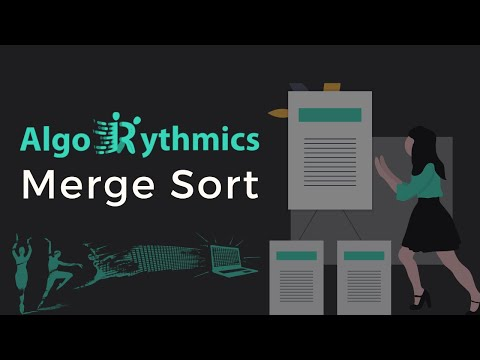

In [19]:
from IPython.display import YouTubeVideo

YouTubeVideo('XaqR3G_NVoo', height=600, width=900)

**Un pseudocode possible** *(source : Wikipedia)*

```
procedure tri_fusion (E/S t :Tableau[1..MAX] d’Entier,E nb :Naturel) 
debut
    tri_fusion_recursif(t,0,nb)
fin

procedure tri_fusion_recursif (E/S t :Tableau[1..MAX] d’Entier,E d,f :Naturel) 
debut
    si d < f - 1  alors
        m = (d+f) div 2
        tri_fusion_recursif(t,d, m) 
        tri_fusion_recursif(t, m+1,f) 
        fusionnner(t,d,m,f)
    finsi
fin

procedure fusionner (E/S t : Tableau[1..MAX] d’Entier ; E debut,milieu,fin : Naturel) 
    Declaration i,j,k : Naturel,
                 temp : Tableau[1..MAX] d’Entier
debut
    i ← debut
    j ← milieu
    pour k ← debut a fin faire
        si i < milieu et j <fin alors 
            si t[i] <= t[j] alors
                temp[k] ← t[i]
                i ← i+1 
            sinon
                temp[k] ← t[j]
                j ← j+1 
            finsi
        sinon
            si i < milieu alors
                temp[k] ← t[i]
                i ← i+1 
            sinon
                temp[k] ← t[j]
                j ← j+1 
            finsi
        finsi
    fin pour
    
    pour k ← debut à fin faire 
        t[k] ← temp[k]
    fin pour
fin
    
```

In [33]:
def merge_sort(tab):
    """Trie le tableau via le principe de « diviser pour mieux régner »
    avec l'intelligence du tri qui se trouve au moment de la fusion"""

    merge_sort_r(tab, 0, len(tab))
    
def merge_sort_r(tab, start, end):
    if start < end-1 :
        middle = ( start + end )//2
        merge_sort_r(tab, start, middle)
        merge_sort_r(tab, middle, end)
        merge(tab, start, middle, end)


def merge(tab, start, middle, end):
    temp = tab.copy()
    #"left_half = tab[start:middle] 
    #"right_half = tab[middle:end]
    
    
    i = start
    j = middle
   
    
    for k in range(start, end):
        if i < middle and j< end: 
            if tab [i] <= tab[j]:
                temp[k]= tab[i]
                i=i+1
            else:
                temp[k]=tab[j]
                j=j+1
                
        else:
            if i< middle:
                temp[k]= tab[i]
                i= i+1
            else:
                temp[k]=tab[j]
                j= j+1
    for k in range (start, end):
        tab [k]= temp[k]
                

    
   
    
   

In [35]:
random_array_msr =  generate_random_array()
print(random_array_msr)

merge_sort(random_array_msr)

print('after', random_array_msr)

[14, 11, 10, 2, 20, 6, 9, 8, 19, 7, 12, 18, 5, 3, 13, 15, 0, 1, 16, 4, 17]
after [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


## 1.2 Tri quick sort

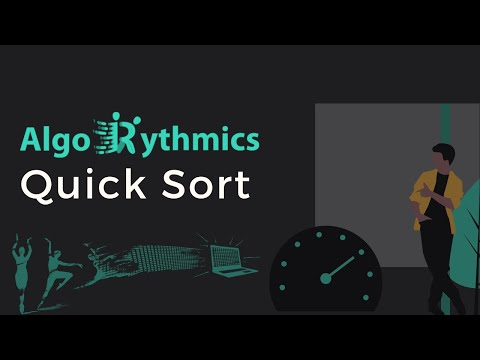

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('ywWBy6J5gz8', height=600, width=900)

**Un pseudocode possible** 

```
tri_rapide(tableau T, entier nb):
    tri_rapide_recursif(T,0,nb-1)


tri_rapide_recursif(tableau T, entier premier, entier dernier)
    si premier < dernier alors
        pivot := partitionner(T, premier, dernier)
        tri_rapide_recursif(T, premier, pivot-1)
        tri_rapide_recursif(T, pivot+1, dernier)
    fin si


partitionner(tableau T, entier premier, entier dernier)
    pivot := T[premier]
    i := premier
    j := dernier
    tant que i <= j faire
        si T[i] <= pivot alors 
            i := i+1
        sinon
            si T[j] > pivot alors
                j := j-1 
            sinon
                echanger(T[i],T[j])
            finsi 
        finsi
    fin tant que
    echanger(t[first],t[j])
    
    retourner j      
```

In [38]:
def quick_sort(tab):
    """Divise le tableau en deux, trie chacune des sous-parties et fusionne
    intelligemment les deux sous-parties triées. L'intelligence se trouve
    dans la division du tableau."""

    quick_sort_r(tab, 0, len(tab)-1)
    

def quick_sort_r(tab, first, last):
    if first < last :
        pivot = partition(tab, first, last)
        quick_sort_r(tab, first, pivot-1)
        quick_sort_r(tab, pivot+1, last)
        
        
def partition(tab, first, last):
    pivot = tab[first]
    i = first
    j = last
    while i <= j :
        if tab[i] <= pivot :
            i = i+1
        elif tab[j] > pivot:
                j = j-1
        else:
            tab[i], tab[j] = tab[j],tab[i]
    
    tab[first], tab[j] = tab[j], tab[first]
    return j
                

In [40]:
random_array_msr =  generate_random_array()
print(random_array_msr)

quick_sort(random_array_msr)

print('after', random_array_msr)

[7, 19, 6, 4, 17, 10, 0, 5, 1, 11, 12, 13, 3, 20, 9, 8, 18, 15, 14, 16, 2]
after [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


# 3 Procedure ou fonction ?

In [ ]:
# Python sort and sorted functions
A = generate_random_array()
print(id(A)) 
A.sort()
print(id(A), id(sorted(A)))